# LegPy for a beam of electrons

This notebook is intended to assist the user of LegPy in the simulation of an electron beam  

# LegPy

#### Fernando Arqueros, Victor Moya, Jaime Rosado


LegPy (Low energy gamma-ray simulation in Python) is a Monte Carlo simulation code for the transportion of gamma rays and electrons with energies below (or about) a few MeVs through any medium. In this notebook only electron beams are considered.

Several geometries are supported (cylinder, orthohedron and sphere). Electrons are produced as paralell beams or from isotropic sources with energies following several spectral distributions (monoenergetic, flat, exponential, etc.).

## Previous steps

Import modules

In [1]:
import LegPy as lpy
import numpy as np
import matplotlib.pyplot as plt

The user has to "construct" four objects that are the main ingredients of the MC simulation: 

- The composition of the medium and their physical properties at microscopic level.
- The geometry of the medium.
- The energy spectrum of the electron beam crossing the medium.
- The geometry of the beam.

Let's start.

## Construction of the medium I: Composition

The user has to give data on attenuation coefficients of the medium.

Two options named here **NIST** and **generic** are available. Select and run only the one you choose.




### NIST

The user has to provide a medium name among a list for which there are available data files with accurate CSDA ranges from the NIST database.

In [ ]:
!ls LegPy/electron_data

Now you can construct the medium providing the following data:

- name: 'Al', 'bone', 'Ge', 'NaI', 'Pb', 'water'...
- density (g/cm^3): Optional. Default value is stored in file.

In [ ]:
#medium = lpy.Medium(name='water')
#medium = lpy.Medium(name='Pb')
medium = lpy.Medium(name='Al', density=2.7)
#medium = lpy.Medium(name='bone_compact_ICRU', density=1.8)

### generic

In the absence of a data file, a generic procedure that evaluates the CSDA range from the Bethe-Bloch formula is used.

Now you can construct the medium providing the following data:

- name : only for id. purposes.
- density (g/cm^3).
- Pmol : molecular weight. Not needed if atomic masses are given.
- N : number of atoms of each type.
- Z : corresponding Z values.
- A : corresponding mass numbers.
- I (eV): corresponding Bethe parameters.
- e_E_min (MeV): minimun electron energy considered. Default to 0.01 MeV.
- e_E_max (MeV): maximum electron energy considered. Default to 1.25 MeV.

In [ ]:
medium2 = lpy.Medium(name='water', density=1., Pmol=18.01, Z=[1,8], N=[2,1], A=[1,16], I=[19.2,95.])

## Plot CSDA range vs E (to be implemented)

Next you can plot the continuous slowing down approximation (CSDA) range vs energy of the medium. In the next command you have to provide: 

- energies : array of energies in MeV, better in log scale.
- l_style : line style for plotting ('', ':', etc.), defalut '' (solid line).

Several media can be plotted in the same figure so you can define several media above (with different names) and compare ranges. Also you can compare NIST with generic models for the same medium.

This step is optional so you can skip it.

In [ ]:
E1 = 0.01 # MeV
E2 = 20. # MeV
energy_range = np.logspace(np.log10(E1), np.log10(E2), num=150) # 150 points in a log-scale E(MeV) between E1 and E2
#medium.plot(energies=energy_range)
#medium2.plot(energies=energy_range, l_style=':', tot=True)

## Construction of the medium II: Geometry

Several geometries are available.





### Cylinder





Cylinder oriented with its axis along the z axis and its base at z=0. You have to provide:
- z (cm): height.
- r or diam (cm): radius or diameter.

For this geometry, you may choose either cylindrical or cartesian voxelization of the energy deposit matrix. Cylindrical voxelization is appropriate for vertical parallel beams along the z axis and isotropic sources located at the z axis. In this case, you have to input the number of intervals along the coordinates r and z:

- n_r.
- n_z.

Cartesian voxelization can also be applied in any situation and medium geometry. Here, you have to provide:

- n_x.
- n_y.
- n_z.

Choose your option and construct the geometry.


In [ ]:
geometry = lpy.Geometry(name='cylinder', z=.2, r=.1, n_z=50, n_r=1) # Cylindrical voxelization
#geometry = lpy.Geometry(name='cylinder', z=.3, r=.2, n_x=10, n_y=10, n_z=10) # Cartesian voxelization

### Orthohedron

Rectangular parallelepiped oriented with its longitudinal axes parallel to the x, y, z axes. The center of bottom side is assumed to be at the origin of coordinates. In this geometry, only the cartesian voxelization is supported. You have to provide the dimensions of the orthohedron and the number of intervals along each axis:

- x (cm).
- y (cm).
- z (cm).
- n_x.
- n_y.
- n_z.

In [ ]:
geometry = lpy.Geometry(name='orthohedron', x=.1, y=.1, z=.1, n_x=10, n_y=10, n_z=10)

### Sphere





Sphere centered at (0,0,0). Both cartesian and spherical voxelization can be chosen. So you have to provide either: 

- r or diam (cm).
- n_r.

Or:

- r (cm).
- n_x.
- n_y.
- n_z.

In [ ]:
#geometry = lpy.Geometry(name='sphere', r=.15, n_r=15) # Spherical voxelization
geometry = lpy.Geometry(name='sphere', diam=.1, n_x=10, n_y=10, n_z=10) # Cartesian voxelization

## Plot the geometry


Plot the geometry in the reference coordinate system. This step is optional.

In [ ]:
geometry.plot();

## Construction of the beam I:  Energy spectrum

The user has to select one of the following options:



### Monoenergetic



Input parameters:
- E (MeV).

In [ ]:
spectrum = lpy.Spectrum(name = 'mono', E = 1.)

### Multi-monoenergetic




Input parameters:
- E_w: energies (MeV) and their corresponding weights in a numpy array (sum of weights must be 1).

In [ ]:
E_w = np.array([[0.511, .80], [1.25, 0.20]]) # [[E1, w1], [E2, w2],....]
spectrum = lpy.Spectrum(name = 'multi_mono', E_w = E_w)



### Flat





Input parameters:
- E_min (MeV).
- E_max (MeV).

In [ ]:
spectrum = lpy.Spectrum(name = 'flat', E_min = 0.1, E_max = 1.0)



### Gaussian profile.





Input parameters: 
- E_mean (MeV).
- E_sigma (MeV).

Internal cut: 2 x E_mean > E > 0.

In [ ]:
spectrum = lpy.Spectrum(name = 'gaussian', E_mean = 0.5, E_sigma = 0.03)



### Exponential 





$I(E) \propto  e^{-E/E_{ch}}$, with E_min < E < E_max.

Input parameters: 

- E_min (MeV).
- E_max (MeV).
- E_ch (MeV).

In [ ]:
spectrum = lpy.Spectrum(name = 'exponential', E_min = 0.1, E_max = 1.0, E_ch = 0.5)



### Reciprocal




$ I(E) \propto \frac{1}{E} $, with E_min < E < E_max.

Input parameters:
- E_min (MeV).
- E_max (MeV).

In [ ]:
spectrum = lpy.Spectrum(name = 'reciprocal', E_min = 0.01, E_max = 15.)



### From a file






The input file must have two columns:

Energy (MeV)   ------   Relative Intensity (au)

An example file is at LegPy/beam_spectra/example.txt. To use this file, just input file='example.txt'. If you want to use your own txt file, you should copy it to the same directory that this notebook is (or to load it to the current Colab session).

In [ ]:
spectrum = lpy.Spectrum(name = 'from_file', file = 'example.txt')

## Plot the spectrum







You can plot the energy spectrum of incident beam. Again, just to check it is OK.

A number of electrons are generated randomly following the requested spectrum in logaritmic scale in the range 0.001 - 20 MeV. You should input:
- n_part : number of particles, default to 10^5.
- n_bin : number of intervals, default to 50.

In [ ]:
spectrum.plot(n_part = 100000, n_bin = 50)

## Construction of the beam II:  Geometry

The user has to select one of the following options:

NOTE: In order not to waste computing time the beam geometry has to be defined in such a way that all particles reach the medium.

### Parallel beam

Parallel beam with entrance plane perpendicular to z axis. In general not applicable for the sphere. 

Input parameters:

- particle = 'electron'
- theta (degrees) : zenith angle from z axis, default to 0.
- phi (degrees) : azimuth angle from x axis, default to 0.
- p_in (cm) : coordinates of the center of the beam cross section at the entrance plane in a numpy array, default to (0,0,0).
- diam (cm) : beam diameter, default to 0. (i.e., pencil beam).

In [ ]:
beam = lpy.Beam(particle='electron', name = 'parallel')
#beam = lpy.Beam(name = 'parallel', theta = 15.0, phi = 30.0, p_in = np.array([0.1, -0.1, 0.0]))
#beam = lpy.Beam(name = 'parallel', theta = 19.0, phi = 30.0)

### Isotropic source / Divergent beam

Three options are available:

1) Isotropic **source** located **inside the medium**.

Input parameters:
- p_in: source location (cm). Default to (0,0,0)

In [ ]:
x, y, z = 0.03, -0.03, 0.05 # cm 
beam = lpy.Beam(particle='electron', name = 'isotropic', p_in = np.array ([x, y, z]))
#beam = lpy.Beam(name = 'isotropic')

2) Isotropic **source** located **outside the medium**. Not applicable for the sphere. 

Input parameters:
- p_in(cm): coordinates of the source location below the XY plane (z<0). Default to x=y=0 (source on the z axis). Small (x,y) values are also possible but might increase the computing time. 
- size of the entrance aperture located on the XY plane, centered at (0,0):
    - if circular, provide diameter (cm)
    - if rectangular, provide x_ap, y_ap (cm) size

In [ ]:
z = 1. # cm 
x, y = 0.02, -0.01 # cm
beam = lpy.Beam(particle='electron', name = 'isotropic', diam = .01, p_in = np.array ([x, y, -z]))
#beam = lpy.Beam(name = 'isotropic', x_ap = 1., y_ap = 0.5, p_in = np.array ([0., 0., -z]))

3) **Divergent beam** with the focus located on the z(<0) axis. Not applicable for the sphere. 

Input parameters:

- p_in(cm): coordinates of the focus location below the XY plane (z<0). Default to x=y=0 (source on the z axis). Small (x,y) values are also possible but might increase the computing time.      
- size of the field located on the XY plane, centered at (0,0):
    - if circular, provide diameter (cm)
    - if rectangular, provide x_ap, y_ap (cm) size

In [ ]:
z = .025 # cm 
diam = .01 # cm
beam = lpy.Beam(particle='electron', name = 'isotropic', diam = diam, p_in = np.array ([0., 0., -z]))

### Plot a few tracks


Check a few (50) electron tracks into the medium with the geometry you have just constructed 

In [ ]:
lpy.Plot_beam(medium, geometry, spectrum, beam)

## Monte Carlo Simulation


It transports the electron beam (defined by the objects "spectrum" and "beam") through the medium (defined by the objects "medium" and "geometry").

**Input**

Parameters to be provided: 

1.   **n_part**: number of beam electrons. Default is *n_part = 100*.
2.   **E_cut** : Energy cut in MeV. Default is *E_cut = 0.01 MeV*.
3.   **tracks** : Plot electron tracks (not advised for > 100 particles). Default is *tracks = False*.
4.   **Edep_matrix** : If True, the simulation evaluates the energy deposition inside the medium. In cylindrical voxelization the matrix of spatial distribution of energy deposit Edep (r, z) is writen onto a file. When the simulation is ended, the spatial distribution of E_dep is plot. Default is *Edep_matrix = False*.
5.   **histograms** : If True, histograms of maximum depths along the z axis and the angular distribution of backscattered electrons are plot and registered in dataframes. Default is *histograms = False*.
6.   **n_ang**, **n_z** : Number of angular and z intervals for the above histograms. Default is 20 for both parameters.
7.   **e_length**, **e_K** : The electron transport is performed by steps of either same length (e_length) or same energy loss fraction (e_K). By default, e_length is obtained from the voxel size, but these parameters may also be specified, if desired.

**Return** 

A tuple of three components: *hist, Edep, empty* (*empty = None* for the simulation of electron beams).

If *histograms = True* 
- hist[0]: DataFrame of electron final depths with information on the attenuation curve in an infinite medium. 
- hits[1]: DataFrame of electron maximum depths for attenuation vs target depth (transmission curve)
- hits[2]: DataFrame of angular distribution of backscattered electrons.

This output data are only meaningful for an electron beam entering the medium at x = y = 0, along the z axis in a cylinder or orthohedron of size larger than the CSDA for the corresponding case.   

If *Edep_matrix = True* and cylindrical voxelization 
- Edep: DataFrame of spatial distribution of energy deposit E$_{\rm dep}(r, z)$ in units of keVcm$^{-3}$ per incident electron.

If *Edep_matrix = True* and cartesian voxelization 
- Edep: nparray with E$_{\rm dep}(x,y,z)$ in units of keVcm$^{-3}$ per incident electron.

In [ ]:
hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = 100, n_z=50,
                tracks=True,
                histograms=True,
                Edep_matrix=True
               )

Once you get familiar with the above options and the Python syntax, you can simulate your specific problem with just a few lines. 

## Examples

### 1) Display of electron tracks (only) ###

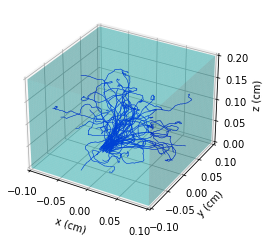

In [2]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='orthohedron', x =.2, y = 0.2, z=.2, n_x=30, n_y=30, n_z=100)
spectrum = lpy.Spectrum(name = 'mono', E = 1.)
beam = lpy.Beam(particle = 'electron', name='parallel', theta=30.0, phi=20.0, diam=.02, p_in=(-0.03,0.,0.))
hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = 50,
                tracks=True,
               )

### 2) Electron range and backscattering studies ###

First, check the CSDA range for an appropriate choice of the size of the medium and the e_length (e_K) parameters   

In [2]:
E = 1.0 #MeV
spectrum = lpy.Spectrum(name='mono', E = E)
medium = lpy.Medium(name='Al') # NIST
e_data = medium.e_data
CSDA = np.interp(E, e_data.E_ref, e_data.R_ref) # cm
CSDAum = CSDA * 1.e4 # um
print('CSDA = ', round(CSDA, 3), 'cm')
#

CSDA =  0.205 cm


A step length of CSDA/100 (or e_K = 0.95) should be enough to get accurate results. For more details visit a notebook with more info.   

In [ ]:
e_length = CSDAum * 0.01 # um (1/100 of CSDA)
#e_K = 0.95


The simulation has ended

Computing time per beam particle =  1.40e-03 seconds

Maximum depth (cm):  0.191
Fraction of backscattered electrons:  0.056


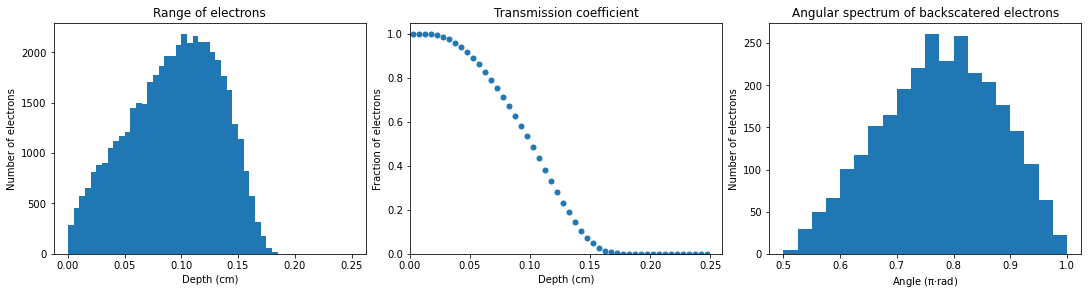

In [3]:
geometry = lpy.Geometry(name='cylinder', diam=.25, z=.25, n_x=30, n_y=30, n_z=100)
beam = lpy.Beam(particle = 'electron', name='parallel')
n_part = 50000
hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = n_part, n_z=50,
                histograms=True,
                e_length = e_length
               )

#### 2.1) Electron range ####

Depending on the practical case, two different definitions of electron range R are used:

- the depth z of the electron at the end of its path. The corresponding dataframe is hist[0].
- the maximum depth reached by the electron. This definition is associated to the transmission curve obtained experimentally when the number of electrons traversing layers of several depths z are measured. The corresponding dataframe is hist[1].

Differences between both ranges might be non-negligible in cases with strong backscattering.  

Both dataframes have three components: x = R(cm), y = number of electrons, z = fraction of electrons.

Check its shape

In [ ]:
hist[0]
#hist[1]

Plot of R distribution and the corresponding integral function of the electron fraction vs R in either definition. Similar to to the plots obtained above but you can personalized them.  

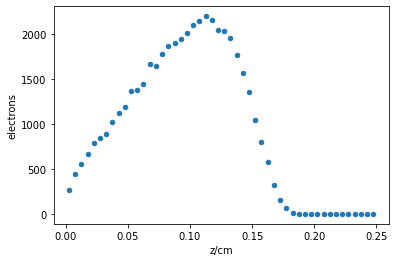

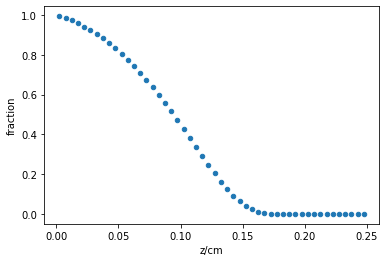

In [6]:
hist[0].plot(kind='scatter', x=0, y=1); hist[0].plot(kind='scatter', x=0, y=2);
#hist[1].plot(kind='scatter', x=0, y=1); hist[1].plot(kind='scatter', x=0, y=2);

Calculation of the **extrapolated range** and other parameters 

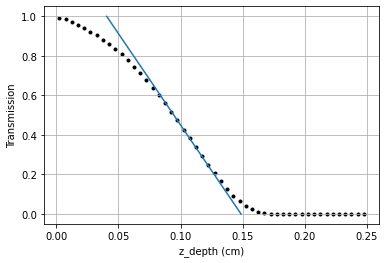

Extrapolated range (cm):  0.149
Distribution mode (cm):  0.102
Distribution average (cm):  0.093


In [4]:
lpy.ext_range(hist[0])
#lpy.ext_range(hist[0])

#### 2.1) Electron Backscattering ####

The dataframe is hist[2]. Check its shape. 

In [5]:
#hist[2]

Backscattering coefficiente, b, is the fraction of backscattered electrons. 

In [6]:
b = hist[2].sum()[1]/n_part
print('b = ', round(100.*b, 2), '%')

b =  5.56 %


Plot the angular distribution of backscattered electrons

<AxesSubplot:xlabel='angle/rad', ylabel='dn/dOmega'>

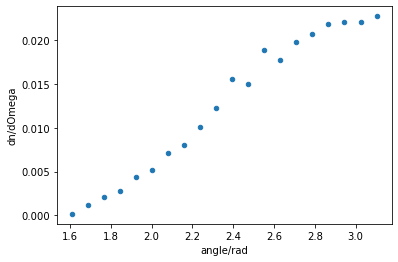

In [7]:
hist[2].plot(kind='scatter', x=0, y=2)

### 3) Energy deposition ###

#### 3.1) Cylindrical symmetry   ####


The simulation has ended

Computing time per beam particle =  2.95e-04 seconds

E_dep_Al_1.00MeV.xlsx written onto disk.; columns = r(cm), rows = z(cm)

Not enough data to fill the histograms for projections of the E_dep matrix.


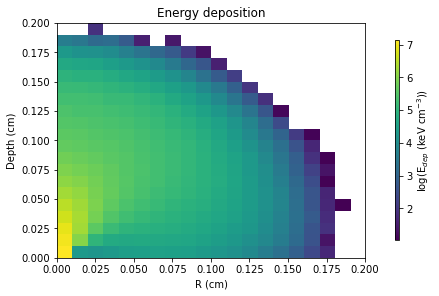

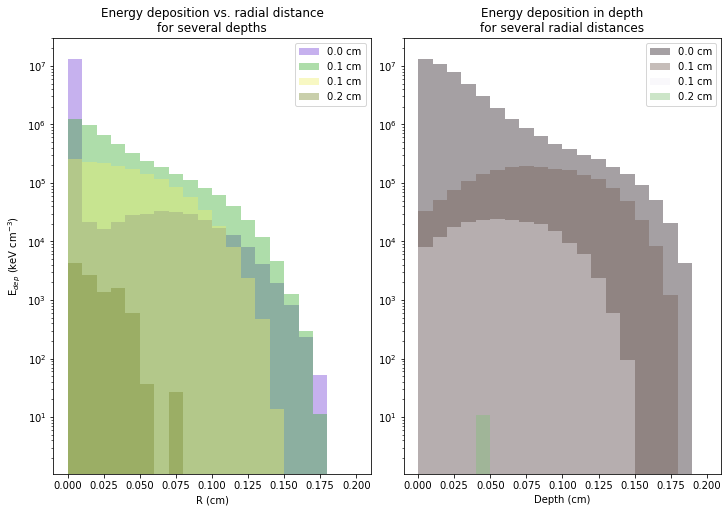

In [12]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='cylinder', r =.2, z=.2, n_r=20, n_z=20)
spectrum = lpy.Spectrum(name = 'mono', E = 1.)
beam = lpy.Beam(particle = 'electron', name='parallel', diam = 0.02)
hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = 50000,
                Edep_matrix = True
               )

The spatial distribution of energy deposit can be studied with the excel file or the Edep dataframe 

Check the structure of Edep  

In [ ]:
#Edep

#### 3.2) Cartesian symmetry   ####


The simulation has ended

Computing time per beam particle =  3.15e-04 seconds



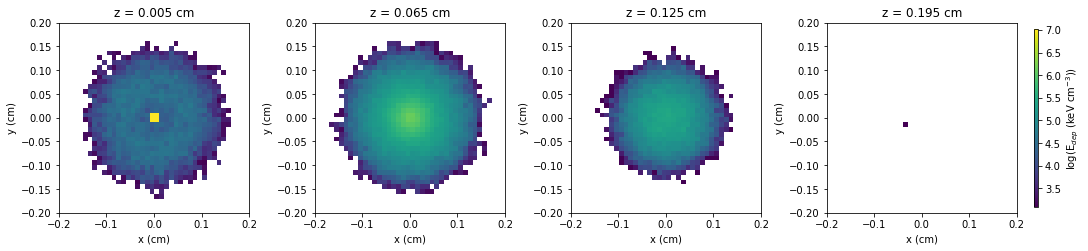

In [14]:
medium = lpy.Medium(name='Al')
r = 0.2
z = 0.2
n_x = 40
n_y = 40
n_z = 20
geometry = lpy.Geometry(name='cylinder', r = r, z = z, n_x = n_x, n_y = n_y, n_z = n_z)
spectrum = lpy.Spectrum(name = 'mono', E = 1.)
beam = lpy.Beam(particle = 'electron', name='parallel', diam = 0.02)
hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = 50000,
                Edep_matrix = True
               )

The spatial distribution of energy deposit is in the Edep dataframe. Check the structure of Edep   

In [ ]:
#Edep

Total energy deposited in the medium

In [77]:
Vp = z/n_z*(2*r)/n_x*(2*r)/n_y # pixel volume (cm^3)
Ed = Edep.sum() * Vp
print('total energy deposit =', round(Ed, 3), 'keV')

total energy deposit = 999.973 keV


Personalized plots of the spatial distribution of Edep can be done with this tool:  

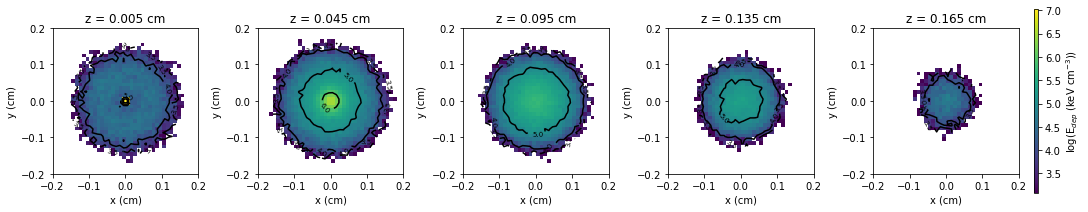

In [32]:
z_ind = ([0, 4, 9, 13, 16]) # index of z layers. 
#lpy.plot_edep_z(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, z_ind)
prof_lev = [3.5, 4., 5., 6., 7.] # niveles de dosis (ajustar segun el resultado de la barra lateral)
lpy.plot_edep_z(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, z_ind, c_profiles = True, lev = prof_lev)

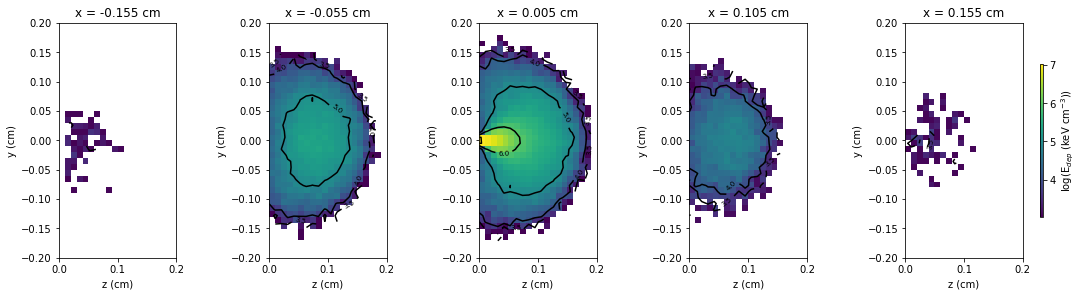

In [30]:
x_ind = ([4, 14, 20, 30, 35]) # index of z layers. 
#lpy.plot_edep_x(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, z_ind)
prof_lev = [3.5, 4., 5., 6., 7.] # niveles de dosis (ajustar segun el resultado de la barra lateral)
lpy.plot_edep_x(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, x_ind, c_profiles = True, lev = prof_lev)

### 4) Backscattered energy ###

Similar to the above case (both cylndrical or cartesian voxelization) but forcing the electron beam to start its path in some point inside the medium     

#### 4.1) Cylindrical symmetry   ####


The simulation has ended

Computing time per beam particle =  3.01e-04 seconds

E_dep_Al_1.00MeV.xlsx written onto disk.; columns = r(cm), rows = z(cm)

Not enough data to fill the histograms for projections of the E_dep matrix.


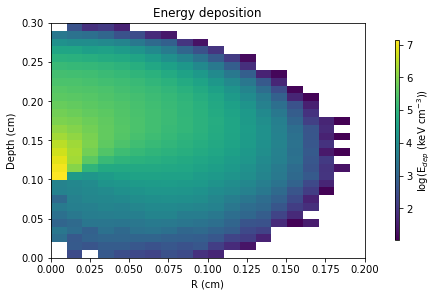

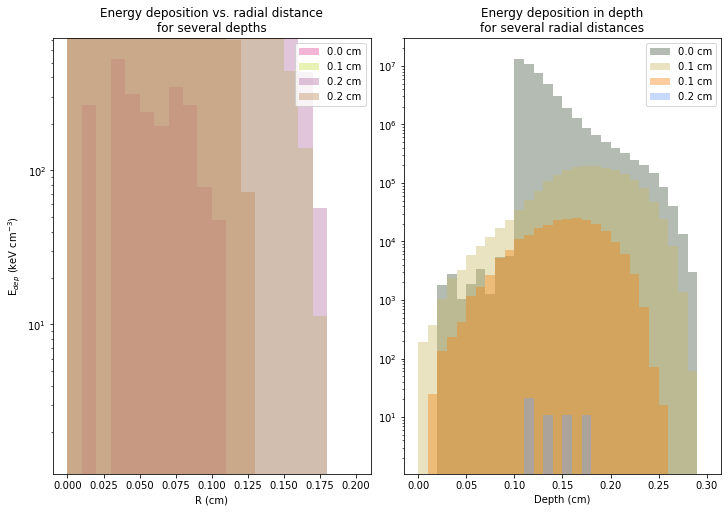

In [35]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='cylinder', r =.2, z=.30, n_r=20, n_z=30)
spectrum = lpy.Spectrum(name = 'mono', E = 1.)
z_in = 0.1
beam = lpy.Beam(particle = 'electron', name='parallel', diam = 0.02, p_in = np.array([0., 0., z_in]))
hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = 50000,
                Edep_matrix = True
               )

#### 4.2) Cartesian symmetry   ####


The simulation has ended

Computing time per beam particle =  3.23e-04 seconds



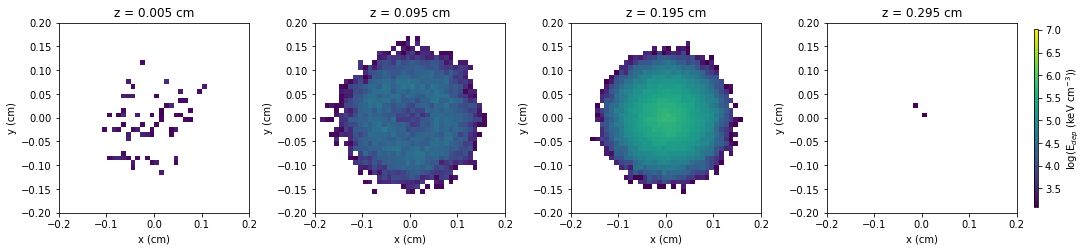

In [36]:
medium = lpy.Medium(name='Al')
r = 0.2
z = 0.3
n_x = 40
n_y = 40
n_z = 30
z_in = 0.1
geometry = lpy.Geometry(name='cylinder', r = r, z = z, n_x = n_x, n_y = n_y, n_z = n_z)
spectrum = lpy.Spectrum(name = 'mono', E = 1.)
z_in = 0.1
beam = lpy.Beam(particle = 'electron', name='parallel', diam = 0.02, p_in = np.array([0., 0., z_in]))

hist, Edep, empty = lpy.MC(medium, geometry, spectrum, beam, n_part = 50000,
                Edep_matrix = True
               )

Personalized plots of the spatial distribution of Edep can be done with this tool:  

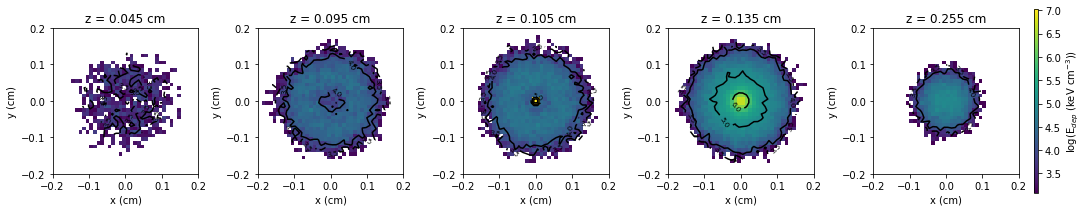

In [67]:
z_ind = ([4, 9, 10, 13, 25]) # index of z layers. 
#lpy.plot_edep_z(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, z_ind)
prof_lev = [3.5, 4., 5., 6., 7.] # niveles de dosis (ajustar segun el resultado de la barra lateral)
lpy.plot_edep_z(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, z_ind, c_profiles = True, lev = prof_lev)

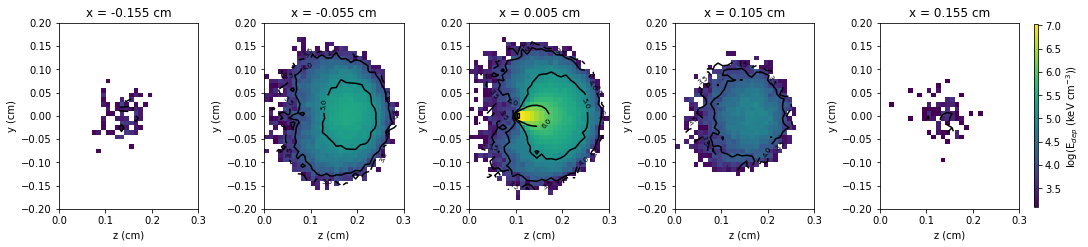

In [45]:
x_ind = ([4, 14, 20, 30, 35]) # index of z layers. 
#lpy.plot_edep_x(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, z_ind)
prof_lev = [3.5, 4., 5., 6., 7.] # niveles de dosis (ajustar segun el resultado de la barra lateral)
lpy.plot_edep_x(Edep, 2.*r, 2.*r, z, n_z, n_x, n_y, x_ind, c_profiles = True, lev = prof_lev)

The energy deposited at z < z_in is the backscattered energy.

In [89]:
Vp = z/n_z*(2*r)/n_x*(2*r)/n_y # pixel volume (cm^3)
Ed = Edep.sum() * Vp #total Edep
Eb = Edep[:,:,0:10].sum() * Vp #back Edep
Ef = Edep[:,:,10:30].sum() * Vp #for Edep

print('Fraction of backsacttered energy =', round(100. * Eb/Ed, 2), '%')

Fraction of backsacttered energy = 2.89 %
